# Modelling calcium trace behavior 

##References
[1] Chen, T. W., Wardill, T. J., Sun, Y., Pulver, S. R., Renninger, S. L., Baohan, A., ... & Looger, L. L. (2013). Ultrasensitive fluorescent proteins for imaging neuronal activity. Nature, 499(7458), 295-300.

##Task
- Build a model that describes the connection between spiking data and calcium traces. 
- Survey and use existing programs that convert calcium signals to spiking data as for example done by Jason Kerr. 

##Background
Considere Figure 3 from [1]:

![title](img/figure3.png)

As can be seen in a) and b) calcium traces do show distinct curves for certain underlying spiking events. The dynamic interplay between a spike train and the calcium trace likeliy to be produces by it will be modeled here.

We will proceed in a step wise fasion starting with a very crude model that is not biophysiologically accurate and then slowly work our way but to produce a more realistic model. 

#Let's get started 
- start with a single neuron
- aproximate calcium trace by a simple alpha function
- put function together in piecewise fasion for now with no additive or multiplicative behavior

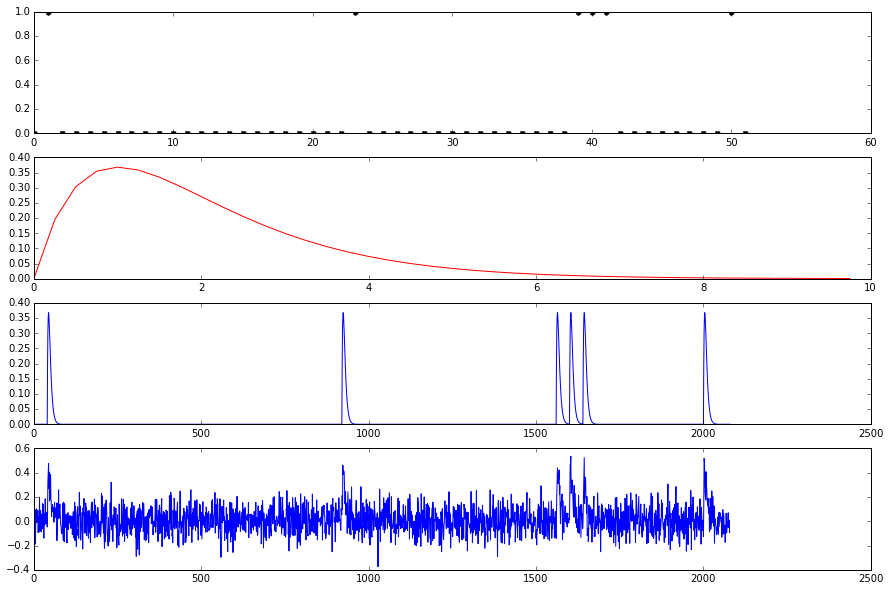

In [56]:
# An implementation of a calcium trace model
# 
# Code by J.V. Schulze - April 2016

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# FUNCTIONS #################################################

# Alpha function to approcimate the shape of a calcium trace
def alpha_func(t):
    a = 1
    b = 1
    return a * t * np.exp(- b*t)

def produceCalciumTrace(spiketrain, temp):
    # given a spike train produce the likely calcium trace
    values = []
    for slot in spiketrain:
        if slot == 0:
            # in case nothing occures add string of zeros
            for value in temp:
                values.append(0)   
        elif slot == 1:
            # in case a spike occured add template piece
            for value in temp:
                values.append(value)
        else:
            values.append(0)
    return values

def addnoise(pure):
    # given a pure signal add some random normal distributed noise
    noise = np.random.normal(0, 0.1, len(pure))
    signal = pure + noise
    return signal

# A spike train is just a list of 0s and 1s
# 1s stand for an action potential occuring
# each slot repersents 1msec
spiketrain = [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0]


# Template has the form of an alpha function
# the length of the template is given by the time interval t
t = np.arange(0.0, 10.0, 0.25)
template = alpha_func(t)

x = produceCalciumTrace(spiketrain, template)

# Add noise to make the data more realistic
# In real 2-photon microscopy data we have about 10% noise
noisy_x = addnoise(x)


# PLOTTING ##################################################
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(spiketrain, '.k', ms=10)

plt.subplot(412)
plt.plot(t, alpha_func(t), 'r')

plt.subplot(413)
plt.plot(x)

plt.subplot(414)
plt.plot(noisy_x)

plt.show()